In [15]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



In [8]:
# Load all sheets from the Excel file into a dictionary of DataFrames
excel_file = pd.ExcelFile('feature_ranking.xlsx')
sheet_names = excel_file.sheet_names

In [9]:
# Load the datasets for training and testing
train_data = pd.read_csv("../../data/BinaryClassify/train_nsl_kdd_binary_encoded.csv")
test_data = pd.read_csv("../../data/BinaryClassify/test_nsl_kdd_binary_encoded.csv")

In [10]:
# Features and labels for training
X_train = train_data.drop("binaryoutcome", axis=1)
y_train = train_data["binaryoutcome"]

# Features and labels for testing
X_test = test_data.drop("binaryoutcome", axis=1)
y_test = test_data["binaryoutcome"]

## Random Forest

Iteration 1: chi_2 - Num Features: 1, Test Accuracy: 0.4308
Iteration 2: chi_2 - Num Features: 2, Test Accuracy: 0.4308
Iteration 3: chi_2 - Num Features: 3, Test Accuracy: 0.4308
Iteration 4: chi_2 - Num Features: 4, Test Accuracy: 0.4311
Iteration 5: chi_2 - Num Features: 5, Test Accuracy: 0.4521
Iteration 6: chi_2 - Num Features: 6, Test Accuracy: 0.4314
Iteration 7: chi_2 - Num Features: 7, Test Accuracy: 0.4524
Iteration 8: chi_2 - Num Features: 8, Test Accuracy: 0.4526
Iteration 9: chi_2 - Num Features: 9, Test Accuracy: 0.4525
Iteration 10: chi_2 - Num Features: 10, Test Accuracy: 0.4483
Iteration 11: chi_2 - Num Features: 11, Test Accuracy: 0.4483
Iteration 12: chi_2 - Num Features: 12, Test Accuracy: 0.4483
Iteration 13: chi_2 - Num Features: 13, Test Accuracy: 0.4622
Iteration 14: chi_2 - Num Features: 14, Test Accuracy: 0.4703
Iteration 15: chi_2 - Num Features: 15, Test Accuracy: 0.4701
Iteration 16: chi_2 - Num Features: 16, Test Accuracy: 0.5181
Iteration 17: chi_2 - Num 

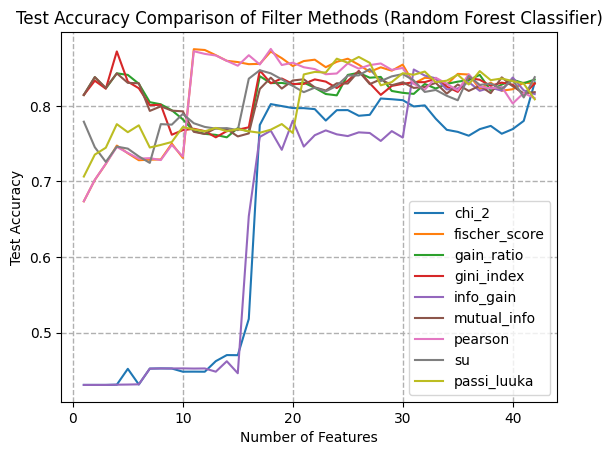

In [6]:
# Iterate through each sheet
filter_accuracy_rf = dict()
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'Feature' and 'Combined Score' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the model on the filtered training data
            clf = RandomForestClassifier()
            clf.fit(x_train_filtered, y_train)

            # Test the model on the filtered test data
            accuracy = clf.score(x_test_filtered, y_test)
            accuracy_scores.append(accuracy)
            num_features.append(i)

            print(f"Iteration {i}: {sheet_name} - Num Features: {i}, Test Accuracy: {accuracy:.4f}")

    # Plot the line for each filter method
    plt.plot(num_features, accuracy_scores, label=sheet_name)
    filter_accuracy_rf[sheet_name] = [num_features,accuracy_scores]
    
plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Random Forest Classifier)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.show()

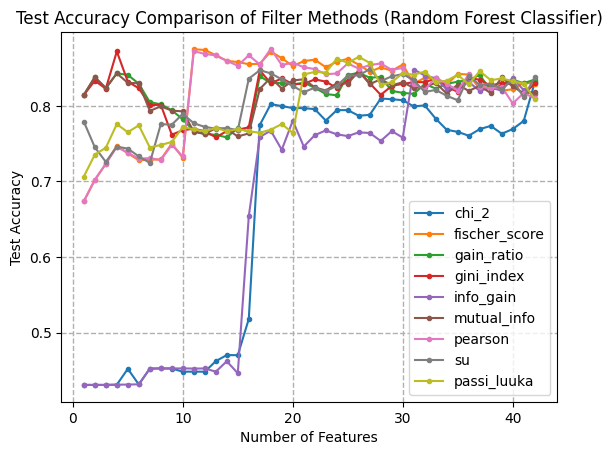

In [11]:
for filter in filter_accuracy_rf:
    plt.plot(filter_accuracy_rf[filter][0],filter_accuracy_rf[filter][1],marker='.',label=filter)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Random Forest Classifier)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)

plt.show()
    

## Plotting the graph with all filters

In [5]:
feature_accuracy_sheet = pd.ExcelFile('feature_acccuracy.xlsx')

In [6]:
acc_sheet_names = feature_accuracy_sheet.sheet_names

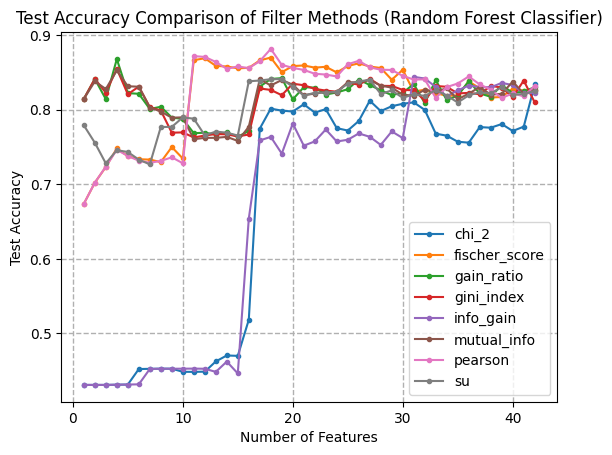

In [29]:
for sheet_name in acc_sheet_names:
    sheet_df = pd.read_excel(feature_accuracy_sheet, sheet_name)
    
    plt.plot(sheet_df['Num of features'], sheet_df['Accuracy'], label=sheet_name,marker='.')
plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Random Forest Classifier)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)

plt.show()

## Plotting with Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [14]:
# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'Feature' and 'Combined Score' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the model on the filtered training data
            clf = LogisticRegression(solver='saga', max_iter=2000, tol=1e-4, penalty='l1')
            clf.fit(x_train_filtered, y_train)

            # Test the model on the filtered test data
            accuracy = clf.score(x_test_filtered, y_test)
            accuracy_scores.append(accuracy)
            num_features.append(i)

            print(f"Iteration {i}: {sheet_name} - Num Features: {i}, Test Accuracy: {accuracy:.4f}")

    # Plot the line for each filter method
    plt.plot(num_features, accuracy_scores, label=sheet_name)
    
plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Logistic Regression)")
plt.legend()  # Add legend for better visualization
plt.show()


Iteration 1: chi_2 - Num Features: 1, Test Accuracy: 0.4308
Iteration 2: chi_2 - Num Features: 2, Test Accuracy: 0.4308
Iteration 3: chi_2 - Num Features: 3, Test Accuracy: 0.4308
Iteration 4: chi_2 - Num Features: 4, Test Accuracy: 0.4311
Iteration 5: chi_2 - Num Features: 5, Test Accuracy: 0.4311
Iteration 6: chi_2 - Num Features: 6, Test Accuracy: 0.4311
Iteration 7: chi_2 - Num Features: 7, Test Accuracy: 0.4311
Iteration 8: chi_2 - Num Features: 8, Test Accuracy: 0.4311
Iteration 9: chi_2 - Num Features: 9, Test Accuracy: 0.4311
Iteration 10: chi_2 - Num Features: 10, Test Accuracy: 0.4311
Iteration 11: chi_2 - Num Features: 11, Test Accuracy: 0.4311


/Users/aravind/Projects/IntrusionDetection/IntrusionDetection/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 12: chi_2 - Num Features: 12, Test Accuracy: 0.4308


KeyboardInterrupt: 

## Plotting with KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Iteration 1: chi_2 - Num Features: 1, Test Accuracy: 0.4308
Iteration 2: chi_2 - Num Features: 2, Test Accuracy: 0.4308
Iteration 3: chi_2 - Num Features: 3, Test Accuracy: 0.4308
Iteration 4: chi_2 - Num Features: 4, Test Accuracy: 0.4311
Iteration 5: chi_2 - Num Features: 5, Test Accuracy: 0.4311
Iteration 6: chi_2 - Num Features: 6, Test Accuracy: 0.4313
Iteration 7: chi_2 - Num Features: 7, Test Accuracy: 0.4316
Iteration 8: chi_2 - Num Features: 8, Test Accuracy: 0.4526
Iteration 9: chi_2 - Num Features: 9, Test Accuracy: 0.4526
Iteration 10: chi_2 - Num Features: 10, Test Accuracy: 0.4526
Iteration 11: chi_2 - Num Features: 11, Test Accuracy: 0.4365
Iteration 12: chi_2 - Num Features: 12, Test Accuracy: 0.4319
Iteration 13: chi_2 - Num Features: 13, Test Accuracy: 0.4864
Iteration 14: chi_2 - Num Features: 14, Test Accuracy: 0.4885
Iteration 15: chi_2 - Num Features: 15, Test Accuracy: 0.4883
Iteration 16: chi_2 - Num Features: 16, Test Accuracy: 0.4929
Iteration 17: chi_2 - Num 

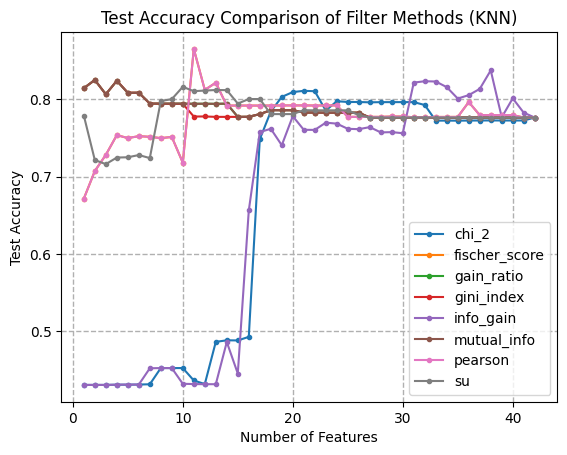

In [35]:
# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'Feature' and 'Combined Score' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the model on the filtered training data
            clf = KNeighborsClassifier(5)
            clf.fit(x_train_filtered, y_train)

            # Test the model on the filtered test data
            accuracy = clf.score(x_test_filtered, y_test)
            accuracy_scores.append(accuracy)
            num_features.append(i)

            print(f"Iteration {i}: {sheet_name} - Num Features: {i}, Test Accuracy: {accuracy:.4f}")

    # Plot the line for each filter method
    plt.plot(num_features, accuracy_scores, label=sheet_name,marker='.')
    
plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (KNN)")
plt.legend()  # Add legend for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.show()


## Decision tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier

Iteration 1: chi_2 - Num Features: 1, Test Accuracy: 0.4308
Iteration 2: chi_2 - Num Features: 2, Test Accuracy: 0.4308
Iteration 3: chi_2 - Num Features: 3, Test Accuracy: 0.4308
Iteration 4: chi_2 - Num Features: 4, Test Accuracy: 0.4311
Iteration 5: chi_2 - Num Features: 5, Test Accuracy: 0.4521
Iteration 6: chi_2 - Num Features: 6, Test Accuracy: 0.4521
Iteration 7: chi_2 - Num Features: 7, Test Accuracy: 0.4524
Iteration 8: chi_2 - Num Features: 8, Test Accuracy: 0.4527
Iteration 9: chi_2 - Num Features: 9, Test Accuracy: 0.4528
Iteration 10: chi_2 - Num Features: 10, Test Accuracy: 0.4484
Iteration 11: chi_2 - Num Features: 11, Test Accuracy: 0.4486
Iteration 12: chi_2 - Num Features: 12, Test Accuracy: 0.4485
Iteration 13: chi_2 - Num Features: 13, Test Accuracy: 0.4626
Iteration 14: chi_2 - Num Features: 14, Test Accuracy: 0.4701
Iteration 15: chi_2 - Num Features: 15, Test Accuracy: 0.4701
Iteration 16: chi_2 - Num Features: 16, Test Accuracy: 0.5178
Iteration 17: chi_2 - Num 

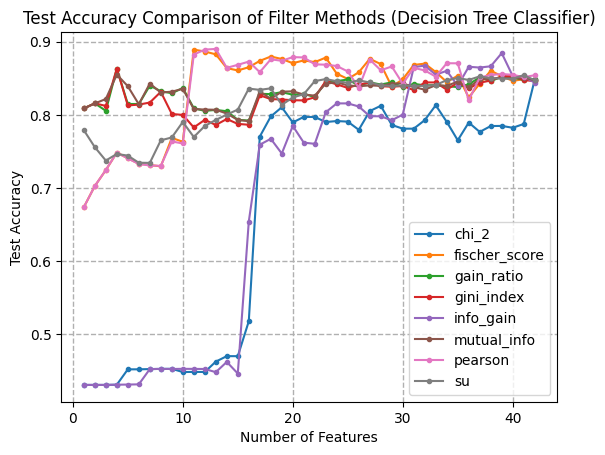

In [33]:
# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'Feature' and 'Combined Score' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the model on the filtered training data
            clf = DecisionTreeClassifier()
            clf.fit(x_train_filtered, y_train)

            # Test the model on the filtered test data
            accuracy = clf.score(x_test_filtered, y_test)
            accuracy_scores.append(accuracy)
            num_features.append(i)

            print(f"Iteration {i}: {sheet_name} - Num Features: {i}, Test Accuracy: {accuracy:.4f}")

    # Plot the line for each filter method
    plt.plot(num_features, accuracy_scores, label=sheet_name,marker='.')
    
plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Decision Tree Classifier)")
plt.legend()  # Add legend for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.show()


## 3 algo in 1

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize dictionaries to store accuracy scores for each classifier
filter_accuracy_rf = dict()
filter_accuracy_knn = dict()
filter_accuracy_dt = dict()

# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'ColumnA' and 'ColumnB' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores_rf = []
    accuracy_scores_knn = []
    accuracy_scores_dt = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the Random Forest model on the filtered training data
            clf_rf = RandomForestClassifier()
            clf_rf.fit(x_train_filtered, y_train)
            # Test the Random Forest model on the filtered test data
            accuracy_rf = clf_rf.score(x_test_filtered, y_test)

            # Train the KNN model on the filtered training data
            clf_knn = KNeighborsClassifier()
            clf_knn.fit(x_train_filtered, y_train)
            # Test the KNN model on the filtered test data
            accuracy_knn = clf_knn.score(x_test_filtered, y_test)

            # Train the Decision Tree model on the filtered training data
            clf_dt = DecisionTreeClassifier()
            clf_dt.fit(x_train_filtered, y_train)
            # Test the Decision Tree model on the filtered test data
            accuracy_dt = clf_dt.score(x_test_filtered, y_test)

            num_features.append(i)

            print(f"Sheet: {sheet_name}, Iteration: {i}, Num Features: {i}, RF Accuracy: {accuracy_rf:.4f}, KNN Accuracy: {accuracy_knn:.4f}, DT Accuracy: {accuracy_dt:.4f}")

            accuracy_scores_rf.append(accuracy_rf)
            accuracy_scores_knn.append(accuracy_knn)
            accuracy_scores_dt.append(accuracy_dt)

    # Store accuracy scores for each classifier in respective dictionaries
    filter_accuracy_rf[sheet_name] = [num_features, accuracy_scores_rf]
    filter_accuracy_knn[sheet_name] = [num_features, accuracy_scores_knn]
    filter_accuracy_dt[sheet_name] = [num_features, accuracy_scores_dt]


Sheet: chi_2, Iteration: 1, Num Features: 1, RF Accuracy: 0.4308, KNN Accuracy: 0.4308, DT Accuracy: 0.4308
Sheet: chi_2, Iteration: 2, Num Features: 2, RF Accuracy: 0.4308, KNN Accuracy: 0.4308, DT Accuracy: 0.4308
Sheet: chi_2, Iteration: 3, Num Features: 3, RF Accuracy: 0.4308, KNN Accuracy: 0.4308, DT Accuracy: 0.4308
Sheet: chi_2, Iteration: 4, Num Features: 4, RF Accuracy: 0.4311, KNN Accuracy: 0.4311, DT Accuracy: 0.4311
Sheet: chi_2, Iteration: 5, Num Features: 5, RF Accuracy: 0.4518, KNN Accuracy: 0.4311, DT Accuracy: 0.4521
Sheet: chi_2, Iteration: 6, Num Features: 6, RF Accuracy: 0.4521, KNN Accuracy: 0.4313, DT Accuracy: 0.4521
Sheet: chi_2, Iteration: 7, Num Features: 7, RF Accuracy: 0.4524, KNN Accuracy: 0.4316, DT Accuracy: 0.4524
Sheet: chi_2, Iteration: 8, Num Features: 8, RF Accuracy: 0.4526, KNN Accuracy: 0.4526, DT Accuracy: 0.4527
Sheet: chi_2, Iteration: 9, Num Features: 9, RF Accuracy: 0.4525, KNN Accuracy: 0.4526, DT Accuracy: 0.4528
Sheet: chi_2, Iteration: 10,

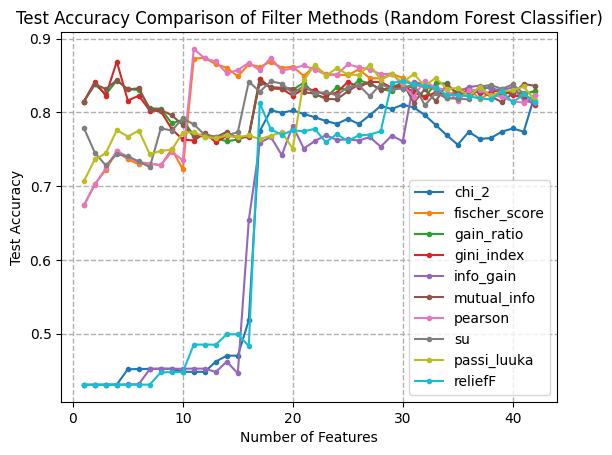

In [12]:
for filter in filter_accuracy_rf:
    plt.plot(filter_accuracy_rf[filter][0],filter_accuracy_rf[filter][1],marker='.',label=filter)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Random Forest Classifier)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)

plt.show()
    

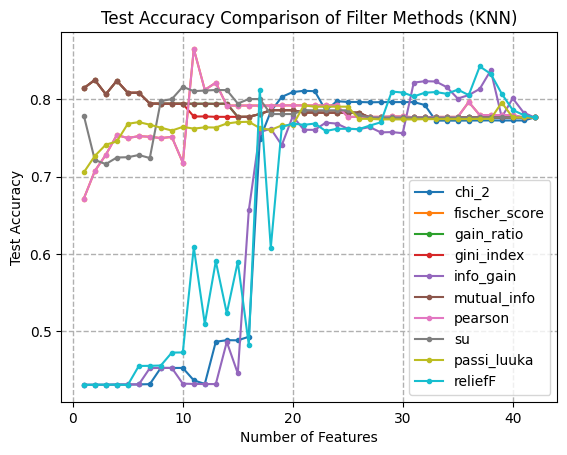

In [13]:
for filter in filter_accuracy_knn:
    plt.plot(filter_accuracy_knn[filter][0],filter_accuracy_knn[filter][1],marker='.',label=filter)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (KNN)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)

plt.show()
    

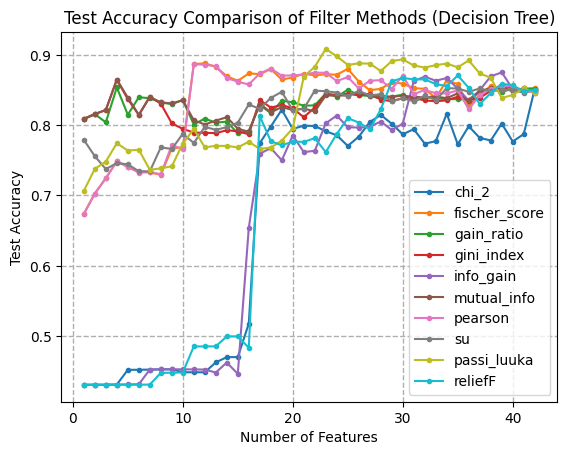

In [14]:
for filter in filter_accuracy_dt:
    plt.plot(filter_accuracy_dt[filter][0],filter_accuracy_dt[filter][1],marker='.',label=filter)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Decision Tree)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)

plt.show()
    

In [16]:
import pandas as pd

# Convert the dictionaries into DataFrames
df_rf = pd.DataFrame.from_dict(filter_accuracy_rf, orient='index', columns=['Num Features', 'Accuracy Scores'])
df_knn = pd.DataFrame.from_dict(filter_accuracy_knn, orient='index', columns=['Num Features', 'Accuracy Scores'])
df_dt = pd.DataFrame.from_dict(filter_accuracy_dt, orient='index', columns=['Num Features', 'Accuracy Scores'])


In [17]:
df_dt

,Num Features,Accuracy Scores
chi_2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.4307767377900013, 0.4307767377900013, 0.430..."
fischer_score,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.673779000133079, 0.7027458634609414, 0.7245..."
gain_ratio,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8088098301024709, 0.8155968593354922, 0.804..."
gini_index,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8088098301024709, 0.8158186576764406, 0.821..."
info_gain,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.4307767377900013, 0.4307767377900013, 0.430..."
mutual_info,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8088098301024709, 0.8158186576764406, 0.821..."
pearson,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.673779000133079, 0.7027458634609414, 0.7245..."
su,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.779088852415384, 0.7558443862839906, 0.7375..."
passi_luuka,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7065164352570643, 0.7378787206671694, 0.748..."
reliefF,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.4305992991172426, 0.43090981679457036, 0.43..."


In [21]:
# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('accuracy_scores.xlsx', engine='xlsxwriter')

# Write each DataFrame to a separate sheet
df_rf.to_excel(writer, sheet_name='RandomForest')
df_knn.to_excel(writer, sheet_name='KNN')
df_dt.to_excel(writer, sheet_name='DecisionTree')

# Close the Pandas Excel writer
writer.close()


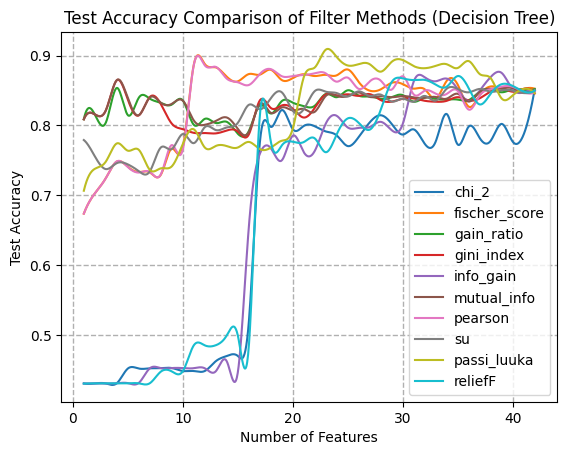

In [39]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# Iterate over filter_accuracy_dt dictionary
for filter_name, accuracy_data in filter_accuracy_dt.items():
    # Interpolate the data points for smoother curves
    num_features = accuracy_data[0]
    accuracy_scores = accuracy_data[1]
    f = interp1d(num_features, accuracy_scores, kind='cubic')

    # Generate more points for smoother curves
    num_features_interp = np.linspace(min(num_features), max(num_features), 1000)
    accuracy_scores_interp = f(num_features_interp)

    # Plot the interpolated data
    plt.plot(num_features_interp, accuracy_scores_interp, label=filter_name)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Decision Tree)")
plt.legend()  # Add legend for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=1)  # Add grid with 1 unit spacing
plt.show()


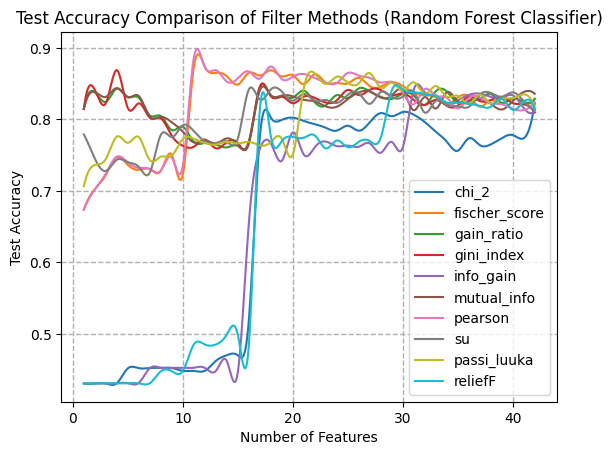

In [40]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# Iterate over filter_accuracy_dt dictionary
for filter_name, accuracy_data in filter_accuracy_rf.items():
    # Interpolate the data points for smoother curves
    num_features = accuracy_data[0]
    accuracy_scores = accuracy_data[1]
    f = interp1d(num_features, accuracy_scores, kind='cubic')

    # Generate more points for smoother curves
    num_features_interp = np.linspace(min(num_features), max(num_features), 1000)
    accuracy_scores_interp = f(num_features_interp)

    # Plot the interpolated data
    plt.plot(num_features_interp, accuracy_scores_interp, label=filter_name)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Random Forest Classifier)")
plt.legend()  # Add legend for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=1)  # Add grid with 1 unit spacing
plt.show()


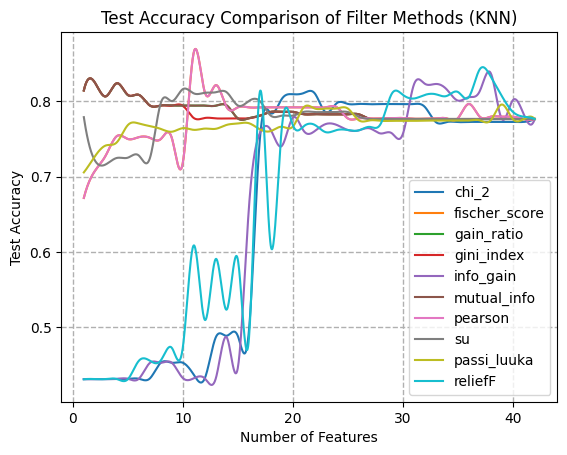

In [42]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# Iterate over filter_accuracy_dt dictionary
for filter_name, accuracy_data in filter_accuracy_knn.items():
    # Interpolate the data points for smoother curves
    num_features = accuracy_data[0]
    accuracy_scores = accuracy_data[1]
    f = interp1d(num_features, accuracy_scores, kind='cubic')

    # Generate more points for smoother curves
    num_features_interp = np.linspace(min(num_features), max(num_features), 1000)
    accuracy_scores_interp = f(num_features_interp)

    # Plot the interpolated data
    plt.plot(num_features_interp, accuracy_scores_interp, label=filter_name)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (KNN)")
plt.legend()  # Add legend for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=1)  # Add grid with 1 unit spacing
plt.show()


## Train and plot with Train Test split

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load all sheets from the Excel file into a dictionary of DataFrames
excel_file = pd.ExcelFile('feature_ranking.xlsx')
sheet_names = excel_file.sheet_names

In [3]:
# Load the datasets for training and testing
data = pd.read_csv("../../data/BinaryClassify/train_nsl_kdd_binary_encoded.csv")
data = data.drop('level',axis=1)

In [4]:
# Define your target variable (assuming the target variable is 'target')
y = data['binaryoutcome']
X = data.drop('binaryoutcome', axis=1)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [6]:


# Initialize dictionaries to store accuracy scores for each classifier
filter_accuracy_rf = dict()
filter_accuracy_knn = dict()
filter_accuracy_dt = dict()

# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'ColumnA' and 'ColumnB' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores_rf = []
    accuracy_scores_knn = []
    accuracy_scores_dt = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the Random Forest model on the filtered training data
            clf_rf = RandomForestClassifier()
            clf_rf.fit(x_train_filtered, y_train)
            # Test the Random Forest model on the filtered test data
            accuracy_rf = clf_rf.score(x_test_filtered, y_test)

            # Train the KNN model on the filtered training data
            clf_knn = KNeighborsClassifier()
            clf_knn.fit(x_train_filtered, y_train)
            # Test the KNN model on the filtered test data
            accuracy_knn = clf_knn.score(x_test_filtered, y_test)

            # Train the Decision Tree model on the filtered training data
            clf_dt = DecisionTreeClassifier()
            clf_dt.fit(x_train_filtered, y_train)
            # Test the Decision Tree model on the filtered test data
            accuracy_dt = clf_dt.score(x_test_filtered, y_test)

            num_features.append(i)

            print(f"Sheet: {sheet_name}, Iteration: {i}, Num Features: {i}, RF Accuracy: {accuracy_rf:.4f}, KNN Accuracy: {accuracy_knn:.4f}, DT Accuracy: {accuracy_dt:.4f}")

            accuracy_scores_rf.append(accuracy_rf)
            accuracy_scores_knn.append(accuracy_knn)
            accuracy_scores_dt.append(accuracy_dt)

    # Store accuracy scores for each classifier in respective dictionaries
    filter_accuracy_rf[sheet_name] = [num_features, accuracy_scores_rf]
    filter_accuracy_knn[sheet_name] = [num_features, accuracy_scores_knn]
    filter_accuracy_dt[sheet_name] = [num_features, accuracy_scores_dt]


Sheet: chi_2, Iteration: 1, Num Features: 1, RF Accuracy: 0.9637, KNN Accuracy: 0.9608, DT Accuracy: 0.9634
Sheet: chi_2, Iteration: 2, Num Features: 2, RF Accuracy: 0.9727, KNN Accuracy: 0.9723, DT Accuracy: 0.9724
Sheet: chi_2, Iteration: 3, Num Features: 3, RF Accuracy: 0.9728, KNN Accuracy: 0.9717, DT Accuracy: 0.9725
Sheet: chi_2, Iteration: 4, Num Features: 4, RF Accuracy: 0.9923, KNN Accuracy: 0.9882, DT Accuracy: 0.9917
Sheet: chi_2, Iteration: 5, Num Features: 5, RF Accuracy: 0.9959, KNN Accuracy: 0.9928, DT Accuracy: 0.9948
Sheet: chi_2, Iteration: 6, Num Features: 6, RF Accuracy: 0.9970, KNN Accuracy: 0.9951, DT Accuracy: 0.9964
Sheet: chi_2, Iteration: 7, Num Features: 7, RF Accuracy: 0.9982, KNN Accuracy: 0.9957, DT Accuracy: 0.9972
Sheet: chi_2, Iteration: 8, Num Features: 8, RF Accuracy: 0.9984, KNN Accuracy: 0.9958, DT Accuracy: 0.9979
Sheet: chi_2, Iteration: 9, Num Features: 9, RF Accuracy: 0.9987, KNN Accuracy: 0.9958, DT Accuracy: 0.9981
Sheet: chi_2, Iteration: 10,

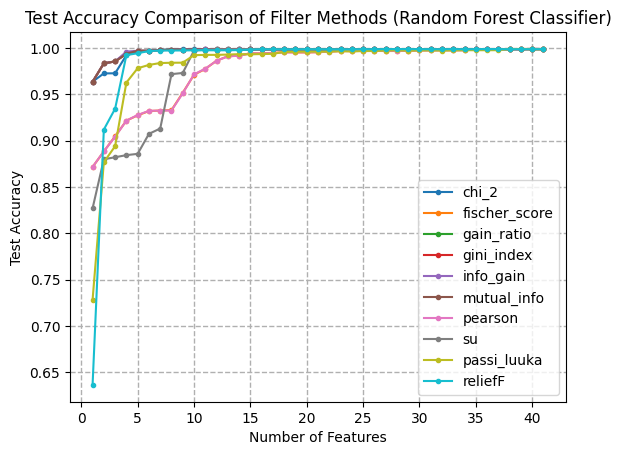

In [7]:
for filter in filter_accuracy_rf:
    plt.plot(filter_accuracy_rf[filter][0],filter_accuracy_rf[filter][1],marker='.',label=filter)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Random Forest Classifier)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)

plt.show()
    

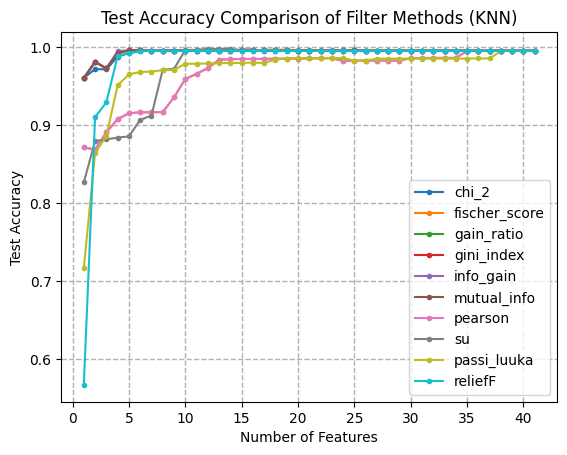

In [8]:
for filter in filter_accuracy_knn:
    plt.plot(filter_accuracy_knn[filter][0],filter_accuracy_knn[filter][1],marker='.',label=filter)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (KNN)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)

plt.show()
    

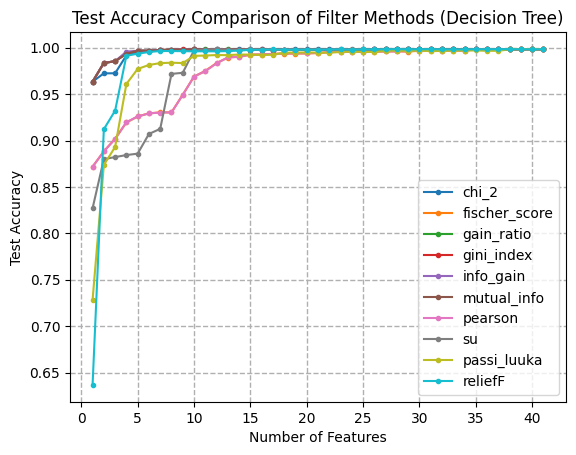

In [9]:
for filter in filter_accuracy_dt:
    plt.plot(filter_accuracy_dt[filter][0],filter_accuracy_dt[filter][1],marker='.',label=filter)

plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Decision Tree)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)

plt.show()
    

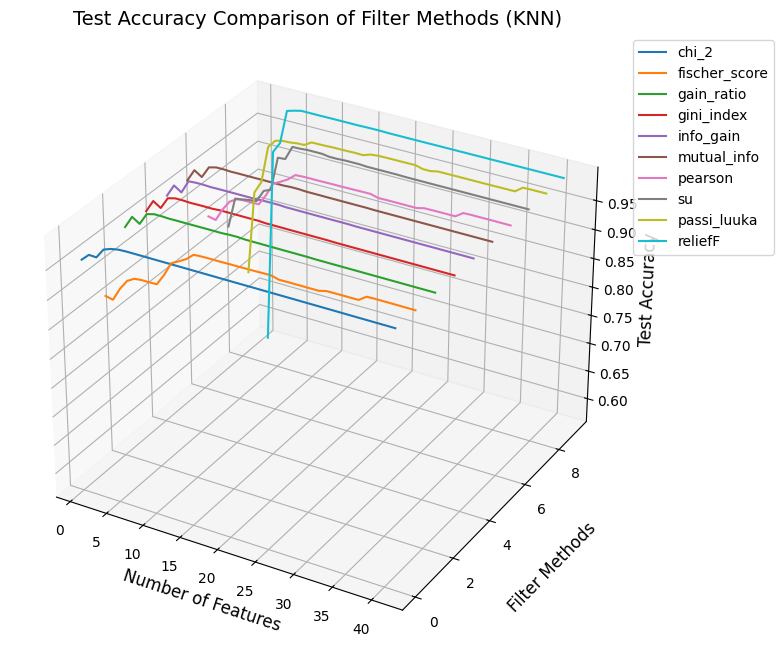

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Increase the overall figure size
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

# Assuming 'filters' is a list of your filters
for i, filter in enumerate(filter_accuracy_knn):
    ax.plot(filter_accuracy_knn[filter][0], filter_accuracy_knn[filter][1], zs=i, zdir='y', label=filter)

# Increase label and title font sizes
ax.set_xlabel('Number of Features', fontsize=12)
ax.set_ylabel('Filter Methods', fontsize=12,labelpad=15)
ax.set_zlabel('Test Accuracy', fontsize=12)
ax.set_title('Test Accuracy Comparison of Filter Methods (KNN)', fontsize=14)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


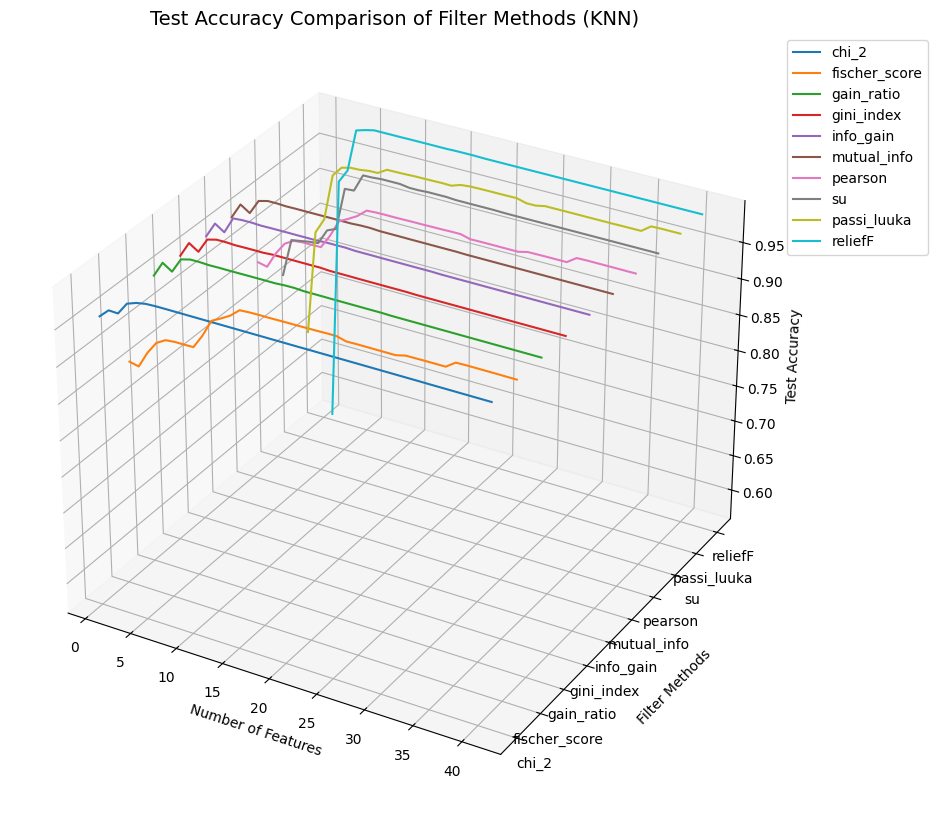

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Increase the overall figure size
fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

# Assuming 'filters' is a list of your filters
for i, filter in enumerate(filter_accuracy_knn):
    ax.plot(filter_accuracy_knn[filter][0], [i]*len(filter_accuracy_knn[filter][0]), filter_accuracy_knn[filter][1], label=filter)

# Set yticks as filter names
ax.set_yticks(range(len(filter_accuracy_knn)))
ax.set_yticklabels(filter_accuracy_knn)

# Increase label and title font sizes
ax.set_xlabel('Number of Features', fontsize=10)
ax.set_ylabel('Filter Methods', fontsize=10,labelpad=15)
ax.set_zlabel('Test Accuracy', fontsize=10)
ax.set_title('Test Accuracy Comparison of Filter Methods (KNN)', fontsize=14)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


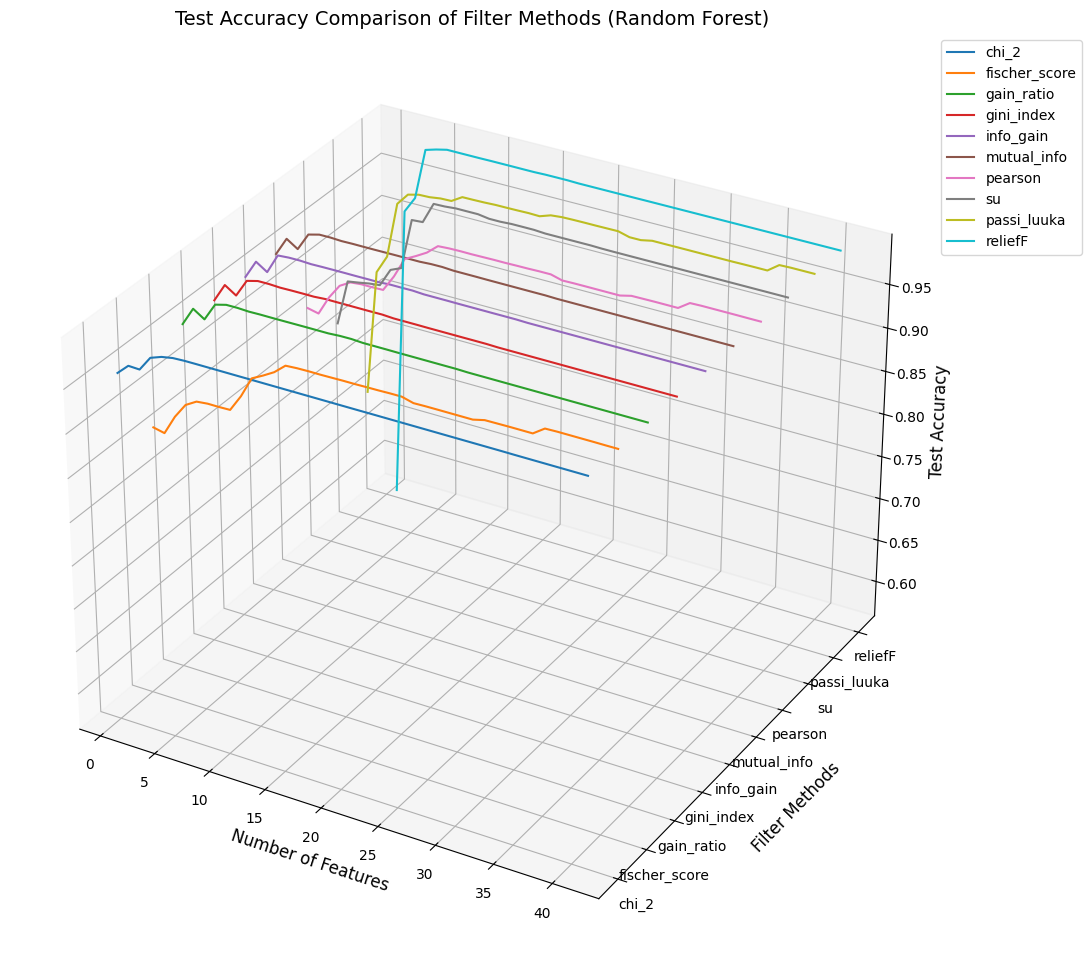

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Increase the overall figure size
fig = plt.figure(figsize=(14, 12))

ax = fig.add_subplot(111, projection='3d')

# Assuming 'filters' is a list of your filters
for i, filter in enumerate(filter_accuracy_rf):
    ax.plot(filter_accuracy_knn[filter][0], [i]*len(filter_accuracy_rf[filter][0]), filter_accuracy_knn[filter][1], label=filter)

# Set yticks as filter names
ax.set_yticks(range(len(filter_accuracy_rf)))
ax.set_yticklabels(filter_accuracy_rf)

# Increase label and title font sizes
ax.set_xlabel('Number of Features', fontsize=12)
ax.set_ylabel('Filter Methods', fontsize=12,labelpad=15)
ax.set_zlabel('Test Accuracy', fontsize=12)
ax.set_title('Test Accuracy Comparison of Filter Methods (Random Forest)', fontsize=14)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


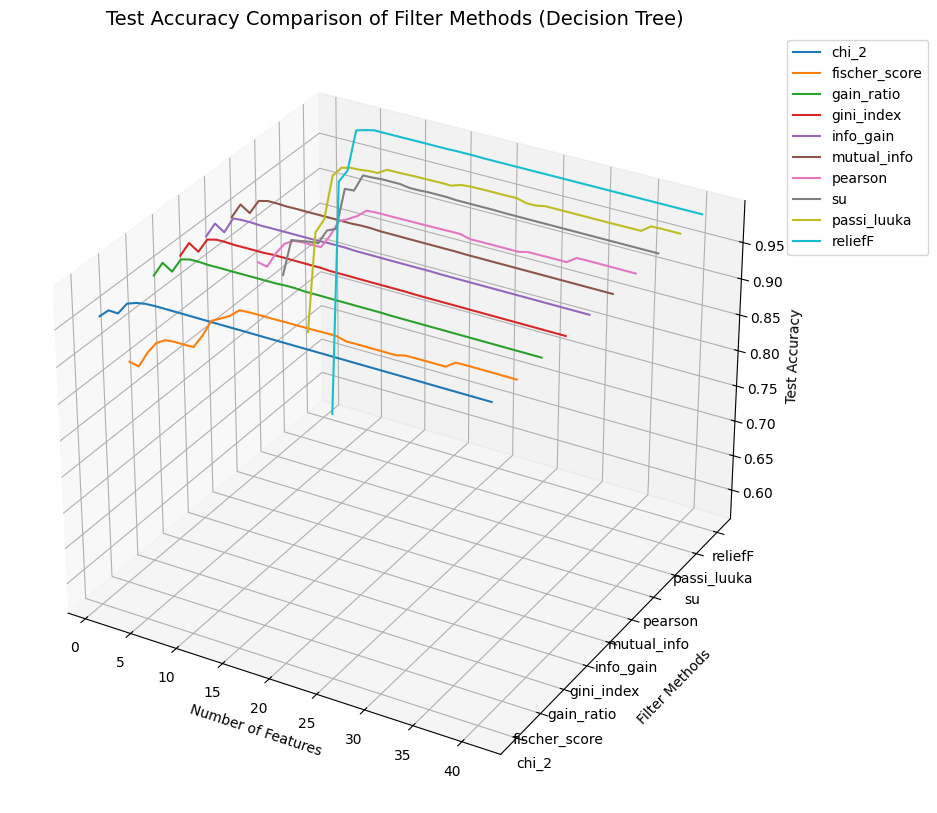

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Increase the overall figure size
fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

# Assuming 'filters' is a list of your filters
for i, filter in enumerate(filter_accuracy_dt):
    ax.plot(filter_accuracy_knn[filter][0], [i]*len(filter_accuracy_dt[filter][0]), filter_accuracy_knn[filter][1], label=filter)

# Set yticks as filter names
ax.set_yticks(range(len(filter_accuracy_dt)))
ax.set_yticklabels(filter_accuracy_dt)

# Increase label and title font sizes
ax.set_xlabel('Number of Features', fontsize=10)
ax.set_ylabel('Filter Methods', fontsize=10,labelpad=15)
ax.set_zlabel('Test Accuracy', fontsize=10)
ax.set_title('Test Accuracy Comparison of Filter Methods (Decision Tree)', fontsize=14)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
